In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [39]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [40]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [41]:
y_train.shape

(50000, 1)

In [42]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array



In [43]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [44]:
y_test = y_test.reshape(-1,)

In [45]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[3]

'cat'

In [46]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

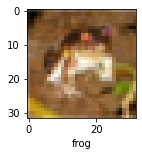

In [47]:
plot_sample(X_train, y_train, 0)

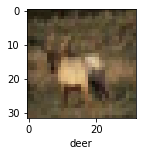

In [48]:
plot_sample(X_train, y_train, 3)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

**Normalizing the training**

In [49]:
X_train = X_train/255.0
X_test = X_test/255.0

**Build simple artificial neural network for image classification**

In [50]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 4ms/step - loss: 1.8142 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6262 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5434 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4817 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4320 - accuracy: 0.4972


In [51]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5092 - accuracy: 0.4604


[1.5091995000839233, 0.4603999853134155]

In [52]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.71      0.50      1000
           1       0.57      0.61      0.59      1000
           2       0.46      0.14      0.21      1000
           3       0.42      0.17      0.25      1000
           4       0.34      0.54      0.42      1000
           5       0.44      0.36      0.39      1000
           6       0.54      0.49      0.51      1000
           7       0.47      0.62      0.54      1000
           8       0.52      0.66      0.58      1000
           9       0.68      0.30      0.42      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.44     10000
weighted avg       0.48      0.46      0.44     10000



In [53]:
# y_train_categorical = keras.utils.to_categorical(
#     y_train, num_classes = 10
# )

# y_test_categorical = keras.utils.to_categorical(
#     y_test, num_classes = 10
# )

In [54]:
# y_train_categorical.shape

In [55]:
# x_train.shape

In [56]:
# cnn = models.Sequential([
#     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# cnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# cnn.fit(x_train, y_train, epochs=10)

In [57]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [61]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 4ms/step - loss: 1.4682 - accuracy: 0.4713
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1127 - accuracy: 0.6094
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9871 - accuracy: 0.6548
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9079 - accuracy: 0.6841
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8380 - accuracy: 0.7090
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7837 - accuracy: 0.7276
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7384 - accuracy: 0.7408
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6904 - accuracy: 0.7590
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6531 - accuracy: 0.7725
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.61

In [63]:
     
cnn.history.history 

{'loss': [1.4682114124298096,
  1.1127498149871826,
  0.987051248550415,
  0.9078999757766724,
  0.8379675149917603,
  0.7837087512016296,
  0.7383920550346375,
  0.6903730630874634,
  0.6530588865280151,
  0.6157839894294739],
 'accuracy': [0.4712800085544586,
  0.6093800067901611,
  0.6547999978065491,
  0.6840800046920776,
  0.7090200185775757,
  0.7275999784469604,
  0.7408199906349182,
  0.7589799761772156,
  0.7724999785423279,
  0.7843199968338013]}

In [64]:
import pandas as pd

In [65]:
df = pd.DataFrame(cnn.history.history)

In [66]:
df.head()

,loss,accuracy
0,1.468211,0.47128
1,1.112750,0.60938
2,0.987051,0.65480
3,0.907900,0.68408
4,0.837968,0.70902


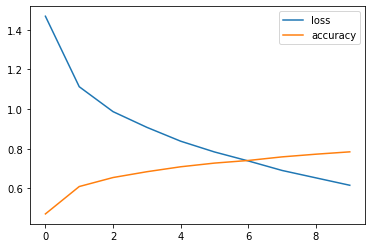

In [67]:
df[['loss', 'accuracy']].plot();